In [9]:
import os

import numpy as np

from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16, preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D, Dropout

from keras.models import Model

from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [10]:
# Set directory paths
data_dir = 'C:\Active-Projects\RHUL-FYP\PROJECT\skin-cancer-dataset\Resized_200x200_MIX_2Classes'

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 20
NUM_CLASSES = 2
EPOCHS = 200

In [11]:
# Data generators

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Scale the input in range (0, 1)
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2,
    rotation_range=360,
    vertical_flip=True,
    brightness_range=(0.7, 1.3),
)


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset="training",
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    subset="validation",
)


Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [12]:
# Load pre-trained VGG16 and create a new custom model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the original VGG16 model

for layer in base_model.layers[:-5]:
	layer.trainable = False

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 292ms/step - loss: 0.7011 - accuracy: 0.5567 - val_loss: 0.6956 - val_accuracy: 0.5625
Epoch 2/100
20/20 [==============================] - 4s 209ms/step - loss: 0.6889 - accuracy: 0.5567 - val_loss: 0.6852 - val_accuracy: 0.5625
Epoch 3/100
20/20 [==============================] - 4s 196ms/step - loss: 0.6857 - accuracy: 0.5567 - val_loss: 0.6805 - val_accuracy: 0.5625
Epoch 4/100
20/20 [==============================] - 4s 204ms/step - loss: 0.6803 - accuracy: 0.5567 - val_loss: 0.6763 - val_accuracy: 0.5625
Epoch 5/100
20/20 [==============================] - 4s 191ms/step - loss: 0.6786 - accuracy: 0.5567 - val_loss: 0.6689 - val_accuracy: 0.5729
Epoch 6/100
20/20 [==============================] - 4s 192ms/step - loss: 0.6752 - accuracy: 0.5593 - val_loss: 0.6652 - val_accuracy: 0.6250
Epoch 7/100
20/20 [==============================] - 4s 190ms/step - loss: 0.6700 - accuracy: 0.5670 - val_loss: 0.6601 - val_accuracy: 0.6146

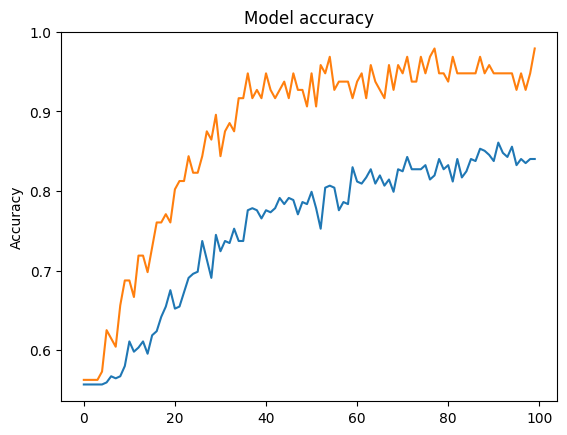

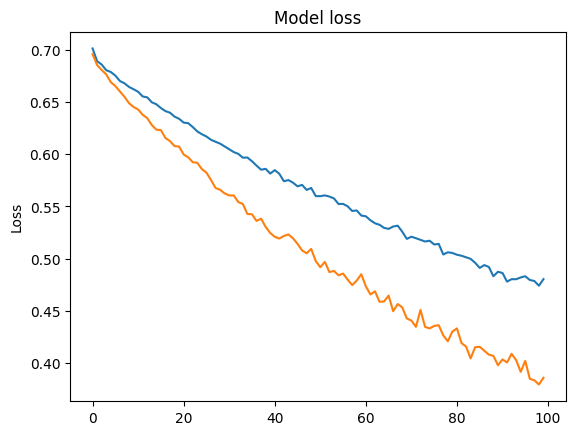

In [14]:
# Show the history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()


In [15]:
for layer in model.layers:
	 layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(train_generator, epochs=EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/100
20/20 [==============================] - 14s 342ms/step - loss: 0.4712 - accuracy: 0.8454 - val_loss: 0.3969 - val_accuracy: 0.9375
Epoch 2/100
20/20 [==============================] - 6s 310ms/step - loss: 0.4622 - accuracy: 0.8557 - val_loss: 0.3838 - val_accuracy: 0.9375
Epoch 3/100
20/20 [==============================] - 6s 297ms/step - loss: 0.4618 - accuracy: 0.8247 - val_loss: 0.3656 - val_accuracy: 0.9479
Epoch 4/100
20/20 [==============================] - 6s 303ms/step - loss: 0.4525 - accuracy: 0.8531 - val_loss: 0.3531 - val_accuracy: 0.9167
Epoch 5/100
20/20 [==============================] - 6s 303ms/step - loss: 0.4500 - accuracy: 0.8505 - val_loss: 0.3608 - val_accuracy: 0.9062
Epoch 6/100
20/20 [==============================] - 7s 327ms/step - loss: 0.4429 - accuracy: 0.8582 - val_loss: 0.3568 - val_accuracy: 0.9479
Epoch 7/100
20/20 [==============================] - 7s 326ms/step - loss: 0.4301 - accuracy: 0.8686 - val_loss: 0.3565 - val_accuracy: 0.916

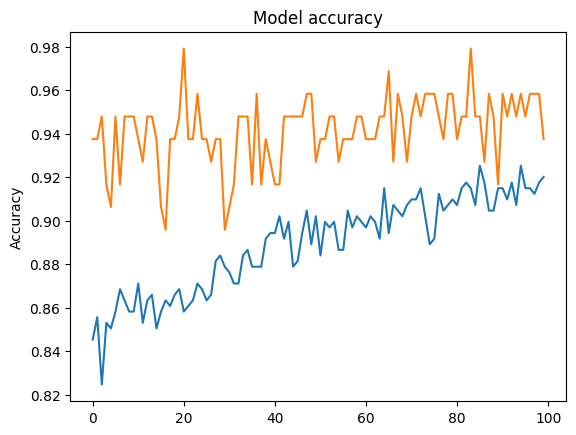

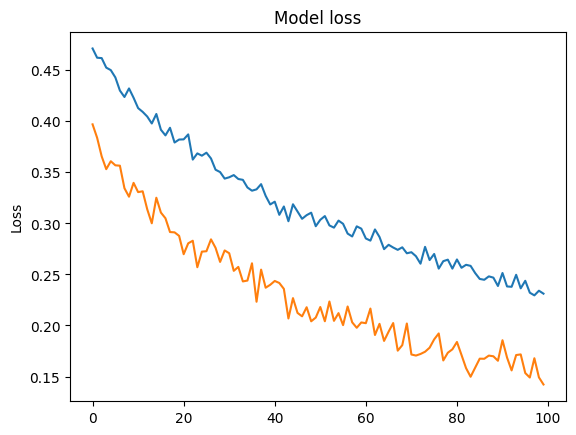

In [16]:
plt.plot(fine_tune_history.history['accuracy'])
plt.plot(fine_tune_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.show()

# Plot the loss
plt.plot(fine_tune_history.history['loss'])
plt.plot(fine_tune_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.show()
